<a href="https://colab.research.google.com/github/FranciscoFoz/Analise_exploratoria_biblioteca_Sao_Francisco/blob/main/Analise_exploratoria_Bibliotecas_SaoFrancisco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color= MediumSpringGreen		size = 6> Sistema integrado das bibliotecas de São Francisco: Uma análise exploratória dos dados 


## Resumo
A análise exploratória de dados é uma abordagem utilizada para se conhecer os dados a se trabalhar. 
A partir da limpeza, conhecimento das variáveis, resumos das principais características estatísticas e visualizações, pode-se responder algumas perguntas básicas e deixar o conjunto pronto para análises mais profundas.

Este projeto tem como objetivo principal realizar uma **análise exploratória** do conjunto de dados do sistema de bibliotecas de São Francisco. Serão realizadas algumas visualizações, mas não serão aperfeiçoadas, pois o foco principal deste projeto é a exploração e entendimento inicial do conjunto de dados.

### Dataset

Encontrei esse conjuntos inicialmente no [Kaggle](https://www.kaggle.com/datasf/sf-library-usage-data?select=Library_Usage.csv), mas estarei utilizando os dados do [Portal de dados da cidade de São Francisco](https://data.sfgov.org/Culture-and-Recreation/Library-Usage/qzz6-2jup).

O conjunto de dados inclui aproximadamente 420.000 registros, com cada registro representando um usuário anônimo da biblioteca. As colunas individuais incluem estatísticas sobre o código de tipo e idade do usuário, o ano em que o usuário se registrou (somente desde 2003) e a intensidade com que o usuário tem utilizado o sistema de biblioteca (em termos de número de checkouts) desde o primeiro registro (Resumo extraído do Kaggle). 

Vocês poderão acessar os dados utilizados nesta análise [aqui](https://drive.google.com/file/d/1wTom0A8SRd7XlR-pBqu720O1rhOR41uD/view?usp=sharing).

### Questionamentos:
*    Quais são e qual a quantidade de usuários por tipo?
*    Quais são e qual a quantidade de usuários por faixa etária?
*    Quais são as bibliotecas e qual a quantidade de usuários  por bibliotecas?
*    Quantos empréstimos foram realizados? Por tipo de usuário e por biblioteca.
*    Quantas renovações foram realizadas? Por tipo de usuário e por biblioteca.
*    Quais são os tipos de recebimento de aviso? Qual a quantidade de usuários que preferem cada tipo? Quais são os tipos de usuários que preferem cada tipo?
*    Como está distribuída a frequencia de usuários que fornecem endereço de email? Quem são os usuários que não fornecem? 
*    Qual a quantidade de usuários que não são de São Francisco?
*    Qual a quantidade de usuários que não realizam empréstimos a mais de 1 ano?
*    Qual a distribuição da quantidade média de empréstimos realizados por ano por tipo de usuário?
*    Há uma correlação entre o número de empréstimos e de renovações?



### <font color= MediumSpringGreen> Bibliotecas utilizadas 

*   Pandas
*   Zipfile
*   Matplotlib
*   Seaborn


In [ ]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

### <font color= MediumSpringGreen> Importando arquivos

Importarei o conjunto de dados compactado em zip localizado no meu google drive.

In [ ]:
zip = '/content/drive/MyDrive/Data_Science/SanFrancisco_Library/Library_Usage.zip'                    #Link do caminho da pasta

In [ ]:
with zipfile.ZipFile(zip) as z:                                                 #Descompactar pasta
  with z.open('Library_Usage.csv') as f:                                        #Abrir pasta
    dados_biblioteca = pd.read_csv(f)                                           #Ler arquivo

In [ ]:
dados_biblioteca

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,0,ADULT,0,0,20 to 24 years,P1,Park,None,None,z,email,True,2014,False,5.0
1,0,ADULT,31,22,25 to 34 years,S7,Sunset,April,2016,z,email,True,2010,False,4.0
2,0,ADULT,0,0,45 to 54 years,P1,Park,None,None,a,print,False,2016,True,NaN
3,0,ADULT,0,0,25 to 34 years,X,Main Library,None,None,z,email,True,2015,False,3.0
4,0,ADULT,126,11,45 to 54 years,M2,Marina,January,2016,z,email,True,2003,False,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423443,0,ADULT,291,13,10 to 19 years,P5,Portola,March,2015,p,phone,False,2009,False,9.0
423444,0,ADULT,15,11,60 to 64 years,M8,Mission Bay,July,2016,z,email,True,2016,False,6.0
423445,5,STAFF,208,58,0 to 9 years,B4,Bernal Heights,July,2016,z,email,True,2014,False,9.0
423446,0,ADULT,26,0,10 to 19 years,M6,Mission,April,2015,z,email,True,2003,False,9.0


## <font color= MediumSpringGreen> 1. Análise geral

Entenderei as características de quais colunas, quantidade de linhas não nulas e tipo de dados possuo no conjunto.

In [ ]:
dados_biblioteca.info()                                                         #Entender o dataset geral

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423448 entries, 0 to 423447
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Patron Type Code              423448 non-null  int64  
 1   Patron Type Definition        423448 non-null  object 
 2   Total Checkouts               423448 non-null  int64  
 3   Total Renewals                423448 non-null  int64  
 4   Age Range                     423233 non-null  object 
 5   Home Library Code             423408 non-null  object 
 6   Home Library Definition       423448 non-null  object 
 7   Circulation Active Month      423448 non-null  object 
 8   Circulation Active Year       423448 non-null  object 
 9   Notice Preference Code        423448 non-null  object 
 10  Notice Preference Definition  423448 non-null  object 
 11  Provided Email Address        423448 non-null  bool   
 12  Year Patron Registered        423448 non-nul

## <font color= MediumSpringGreen> 2. Questionamentos

#### <font color= MediumSpringGreen> 2.1 Quais são e qual a quantidade de usuários por tipo?

In [ ]:
list(dados_biblioteca['Patron Type Definition'].unique())                             #Listar valores únicos 

['ADULT',
 'SENIOR',
 'WELCOME',
 'TEACHER CARD',
 'JUVENILE',
 'YOUNG ADULT',
 'STAFF',
 'DIGITAL ACCESS CARD',
 'SPECIAL',
 'AT USER ADULT',
 'RETIRED STAFF',
 'VISITOR',
 'BOOKS BY MAIL',
 'AT USER SENIOR',
 'FRIENDS FOR LIFE',
 'AT USER WELCOME',
 'AT USER TEEN',
 'AT USER JUVENILE']

In [ ]:
dados_biblioteca['Patron Type Definition'].value_counts()           #Quantidade de cada tipo de usuário


ADULT                  272251
JUVENILE                59208
SENIOR                  41619
YOUNG ADULT             28816
WELCOME                 14931
TEACHER CARD             1782
DIGITAL ACCESS CARD      1744
SPECIAL                   977
STAFF                     862
VISITOR                   415
AT USER ADULT             349
RETIRED STAFF             157
BOOKS BY MAIL              95
AT USER SENIOR             66
AT USER JUVENILE           47
AT USER WELCOME            45
AT USER TEEN               44
FRIENDS FOR LIFE           40
Name: Patron Type Definition, dtype: int64

Os tipos de usuários parecem duplicados em relação a alguns tipos. Por isso renomearei os que estão com "AT USER" para sua classificação principal.

In [ ]:
dados_biblioteca['Patron Type Definition'] = dados_biblioteca['Patron Type Definition'].replace({'AT USER ADULT':'ADULT',
                                                                                                  'AT USER SENIOR':'SENIOR',
                                                                                                  'AT USER WELCOME':'WELCOME',
                                                                                                  'AT USER TEEN':'TEEN',
                                                                                                  'AT USER JUVENILE':'JUVENILE'})

In [ ]:
qtd_tipo_usuario = pd.DataFrame(dados_biblioteca['Patron Type Definition'].value_counts())                    #Quantidade de cada tipo de usuário
qtd_tipo_usuario['%'] = round(dados_biblioteca['Patron Type Definition'].value_counts(normalize=True)*100,2)  #Realizar o calculo de percentual da quantidade
qtd_tipo_usuario.columns=['Total','%']                                                                        #Renomeando colunas
qtd_tipo_usuario

,Total,%
ADULT,272600,64.38
JUVENILE,59255,13.99
SENIOR,41685,9.84
YOUNG ADULT,28816,6.81
WELCOME,14976,3.54
TEACHER CARD,1782,0.42
DIGITAL ACCESS CARD,1744,0.41
SPECIAL,977,0.23
STAFF,862,0.20
VISITOR,415,0.10


##### <font color= MediumSpringGreen> 2.1.1 Visualização

Text(0.5, 1.0, 'Quantidade de usuários por tipo')

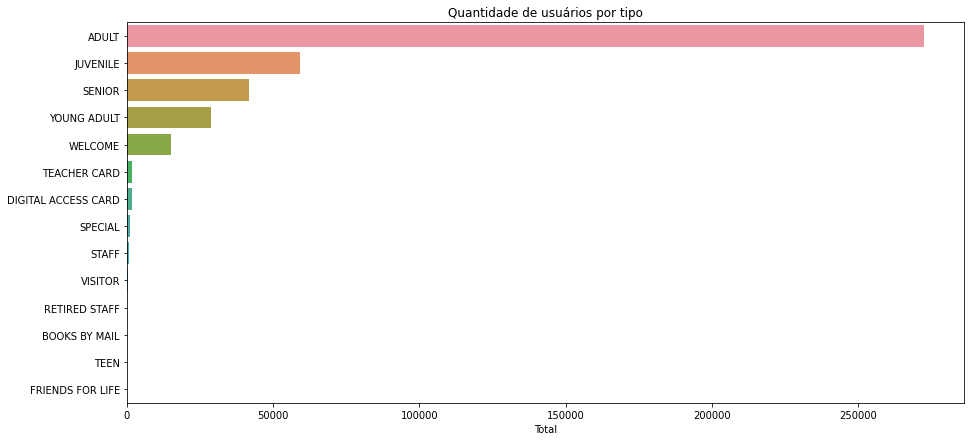

In [ ]:
plt.figure(figsize=(15,7))                                                      #Alterando o tamanho do gráfico
sns.barplot(data=qtd_tipo_usuario,x='Total',y=qtd_tipo_usuario.index)           #Plotando o gráfico
plt.title('Quantidade de usuários por tipo')

A maior parte do público das bibliotecas são adultos e entre os menores números estão os tipos de usuários dos programas especiais do sistema.

#### <font color= MediumSpringGreen> 2.2 Quais são e qual a quantidade de usuários por faixa etária? 

In [ ]:
list(dados_biblioteca['Age Range'].unique())                             #Listar valores únicos 

['20 to 24 years',
 '25 to 34 years',
 '45 to 54 years',
 '65 to 74 years',
 '60 to 64 years',
 '35 to 44 years',
 nan,
 '55 to 59 years',
 '10 to 19 years',
 '0 to 9 years',
 '75 years and over']

Para contabilizar a quantidade de não informados, preencherei os valores nulos com a categoria "Noti informed".

In [ ]:
dados_biblioteca['Age Range'].fillna(value='Not informed',inplace=True)         #Preenchendo os valores nulos

In [ ]:
qtd_faixa_etaria = pd.DataFrame(dados_biblioteca['Age Range'].value_counts())                    #Quantidade de cada tipo de usuário
qtd_faixa_etaria['%'] = round(dados_biblioteca['Age Range'].value_counts(normalize=True)*100,2)  #Realizar o calculo de percentual da quantidade
qtd_faixa_etaria.columns = ['Total','%']
qtd_faixa_etaria

,Total,%
25 to 34 years,91083,21.51
35 to 44 years,67390,15.91
10 to 19 years,58944,13.92
45 to 54 years,52492,12.40
0 to 9 years,38242,9.03
65 to 74 years,30141,7.12
20 to 24 years,29761,7.03
55 to 59 years,21230,5.01
60 to 64 years,19800,4.68
75 years and over,14150,3.34


##### <font color= MediumSpringGreen> 2.2.1 Visualização

Text(0.5, 1.0, 'Quantidade de usuários por faixa etária')

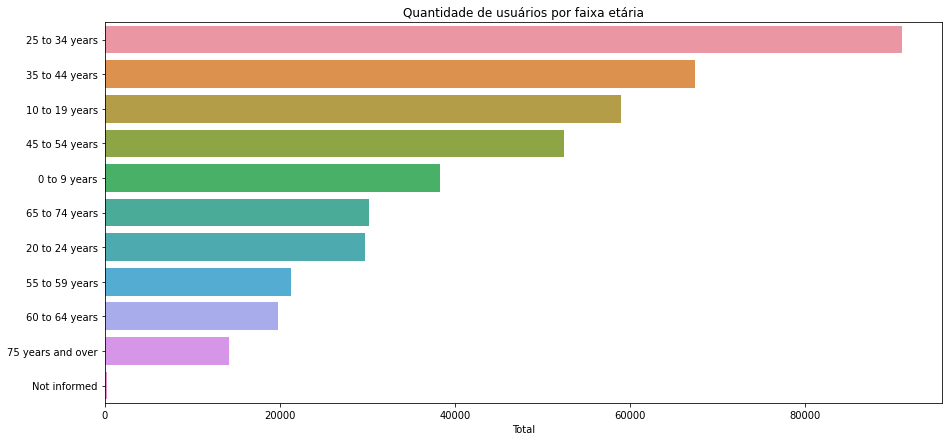

In [ ]:
plt.figure(figsize=(15,7))                                                      #Alterando o tamanho do gráfico
sns.barplot(data=qtd_faixa_etaria,x='Total',y=qtd_faixa_etaria.index)           #Plotando o gráfico
plt.title('Quantidade de usuários por faixa etária')

#### <font color= MediumSpringGreen> 2.3 Tipos de usuários X Faixa etária

Ao explorar a quantidade das duas últimas variavéis, fiquei curioso em entender como se distribuía as faixas etárias pelos tipos de usuários.


In [ ]:
usuario_faixaetaria = pd.DataFrame(dados_biblioteca[['Patron Type Definition','Age Range']].value_counts())       #Criar tabela de tipo de usuário por faixa etária
usuario_faixaetaria

0
Patron Type Definition Age Range            
ADULT                  25 to 34 years  83204
                       35 to 44 years  64123
                       45 to 54 years  50222
JUVENILE               0 to 9 years    37096
YOUNG ADULT            10 to 19 years  28731
...                                      ...
BOOKS BY MAIL          25 to 34 years      1
FRIENDS FOR LIFE       25 to 34 years      1
SPECIAL                Not informed        1
STAFF                  Not informed        1
BOOKS BY MAIL          Not informed        1

[121 rows x 1 columns]

In [ ]:
pd.pivot_table(usuario_faixaetaria,index='Patron Type Definition',columns='Age Range')                  #Pivotar a tabela para entender a distribuição das duas variáveis

0  ...             
Age Range              0 to 9 years  ... Not informed
Patron Type Definition               ...             
ADULT                         383.0  ...        142.0
BOOKS BY MAIL                   NaN  ...          1.0
DIGITAL ACCESS CARD            27.0  ...          1.0
FRIENDS FOR LIFE                NaN  ...          1.0
JUVENILE                    37096.0  ...         30.0
RETIRED STAFF                  60.0  ...          NaN
SENIOR                         21.0  ...         14.0
SPECIAL                        76.0  ...          1.0
STAFF                         425.0  ...          1.0
TEACHER CARD                   15.0  ...          3.0
TEEN                            NaN  ...          NaN
VISITOR                         4.0  ...          NaN
WELCOME                        57.0  ...         14.0
YOUNG ADULT                    78.0  ...          7.0

[14 rows x 11 columns]

Os tipos de usuários não estão coerentes com as faixas etárias estabelecidas. Como no caso do tipo "SENIOR" com 21 usuários dentro da faixa etária de 0-9 anos. 

Realizei uma pesquisa no site do sistema de bibliotecas de São Francisco e enviei um e-mail para o contato estabelecido na fonte de dados, mas não obtive respostas. 

Por isso guiarei a continuidade da análise apenas nos tipos de usuários.

#### <font color= MediumSpringGreen> 2.4 Quais são as bibliotecas e qual a quantidade de usuários  por bibliotecas?

In [ ]:
list(dados_biblioteca['Home Library Definition'].unique())

['Park',
 'Sunset',
 'Main Library',
 'Marina',
 'Chinatown',
 'Portola',
 'Anza',
 'Mission',
 'Potrero',
 'Parkside',
 'Merced',
 'North Beach',
 'Ortega',
 'Presidio',
 'Richmond',
 'Unknown',
 'Mission Bay',
 'Golden Gate Valley',
 'Excelsior',
 'Ingleside',
 'West Portal',
 'Ocean View',
 'Glen Park',
 'Bernal Heights',
 'Visitacion Valley',
 'Western Addition',
 'Bayview/Linda Brooks-Burton',
 'Noe Valley/Sally Brunn',
 'Eureka Valley/Harvey Milk Memorial',
 'Branch Bookmobile (Sunset)',
 'Library on Wheels',
 "Children's Bookmobile",
 'Branch Bookmobile (West Portal)',
 'Branch Bookmobile (Excelsior)',
 'Branch Bookmobile (Marina)']

In [ ]:
qtd_usuarios_biblioteca = pd.DataFrame(dados_biblioteca['Home Library Definition'].value_counts())           #Quantidade de cada tipo de usuário
qtd_usuarios_biblioteca['%'] = round(dados_biblioteca['Home Library Definition'].value_counts(normalize=True)*100,3)  #Realizar o calculo de percentual da quantidade
qtd_usuarios_biblioteca.columns = ['Total de usuários','%']
qtd_usuarios_biblioteca

,Total de usuários,%
Main Library,124814,29.476
Mission,25443,6.009
Richmond,22475,5.308
Chinatown,17140,4.048
Excelsior,16706,3.945
Sunset,15020,3.547
Ortega,14456,3.414
West Portal,13338,3.150
Mission Bay,11271,2.662
Ingleside,10738,2.536


##### <font color= MediumSpringGreen> 2.4.1 Visualização

Text(0.5, 1.0, 'Quantidade de usuários por biblioteca')

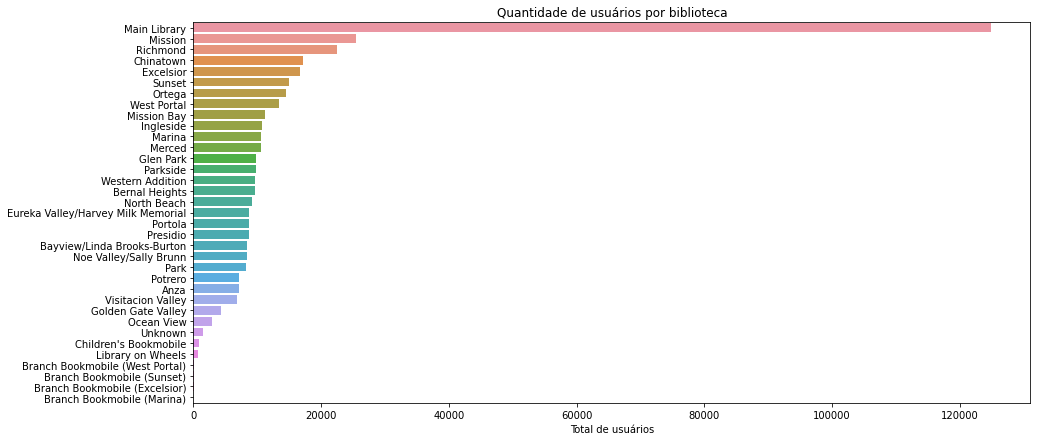

In [ ]:
plt.figure(figsize=(15,7))                                                                                    #Alterando o tamanho do gráfico
sns.barplot(data=qtd_usuarios_biblioteca,x='Total de usuários',y=qtd_usuarios_biblioteca.index)               #Plotando o gráfico
plt.title('Quantidade de usuários por biblioteca')

#### <font color= MediumSpringGreen> 2.5 Quantos empréstimos foram realizados? Por tipo de usuário e por biblioteca.


##### <font color= MediumSpringGreen> 2.5.1 Por tipo de usuário

In [ ]:
qtd_emprestimos_usuarios = dados_biblioteca[['Patron Type Definition','Total Checkouts']].groupby(by='Patron Type Definition').sum()  #Agrupar os dados e realizar a soma
qtd_emprestimos_usuarios = qtd_emprestimos_usuarios.sort_values(by= 'Total Checkouts',ascending=False)                                #Ordenar pelo total
qtd_emprestimos_usuarios['%'] = round((qtd_emprestimos_usuarios * 100) / qtd_emprestimos_usuarios['Total Checkouts'].sum(),2)         #Criar coluna de %
qtd_emprestimos_usuarios.columns = ['Total', '%']                                                                                     #Renomear coluna
qtd_emprestimos_usuarios

,Total,%
Patron Type Definition,,
ADULT,37328848,54.42
SENIOR,12725030,18.55
JUVENILE,10194693,14.86
YOUNG ADULT,6846985,9.98
STAFF,774349,1.13
SPECIAL,303145,0.44
RETIRED STAFF,159409,0.23
TEACHER CARD,136360,0.20
WELCOME,55340,0.08


##### <font color= MediumSpringGreen> 2.5.1 Por biblioteca

In [ ]:
qtd_emprestimos_biblioteca = dados_biblioteca[['Home Library Definition','Total Checkouts']].groupby(by='Home Library Definition').sum()  #Agrupar os dados e realizar a soma
qtd_emprestimos_biblioteca = qtd_emprestimos_biblioteca.sort_values(by= 'Total Checkouts',ascending=False)                                #Ordenar pelo total
qtd_emprestimos_biblioteca['%'] = round((qtd_emprestimos_biblioteca * 100) / qtd_emprestimos_biblioteca['Total Checkouts'].sum(),2)       #Criar coluna de %
qtd_emprestimos_biblioteca.columns = ['Total', '%']
qtd_emprestimos_biblioteca

,Total,%
Home Library Definition,,
Main Library,13644899,19.89
Chinatown,5745218,8.38
Richmond,4894128,7.14
Ortega,4015150,5.85
Sunset,3392047,4.95
Mission,3280190,4.78
West Portal,2939750,4.29
Excelsior,2676300,3.90
Parkside,2102529,3.07


#### <font color= MediumSpringGreen> 2.6 Quantas renovações foram realizadas? Por tipo de usuário e por biblioteca.


##### <font color= MediumSpringGreen> 2.6.1 Por tipo de usuário

In [ ]:
qtd_renovacoes_usuarios = dados_biblioteca[['Patron Type Definition','Total Renewals']].groupby(by='Patron Type Definition').sum()  #Agrupar os dados e realizar a soma
qtd_renovacoes_usuarios = qtd_renovacoes_usuarios.sort_values(by= 'Total Renewals',ascending=False)                                #Ordenar pelo total
qtd_renovacoes_usuarios['%'] = round((qtd_renovacoes_usuarios * 100) / qtd_renovacoes_usuarios['Total Renewals'].sum(),2)         #Criar coluna de %
qtd_renovacoes_usuarios.columns = ['Total', '%']                                                                                     #Renomear coluna
qtd_renovacoes_usuarios

,Total,%
Patron Type Definition,,
ADULT,16575476,65.61
SENIOR,3857345,15.27
JUVENILE,2552936,10.11
YOUNG ADULT,1520620,6.02
STAFF,504796,2.00
SPECIAL,92365,0.37
RETIRED STAFF,77962,0.31
TEACHER CARD,44639,0.18
BOOKS BY MAIL,13141,0.05


##### <font color= MediumSpringGreen> 2.6.1 Por biblioteca

In [ ]:
qtd_renovacoes_biblioteca = dados_biblioteca[['Home Library Definition','Total Renewals']].groupby(by='Home Library Definition').sum()  #Agrupar os dados e realizar a soma
qtd_renovacoes_biblioteca = qtd_renovacoes_biblioteca.sort_values(by= 'Total Renewals',ascending=False)                                #Ordenar pelo total
qtd_renovacoes_biblioteca['%'] = round((qtd_renovacoes_biblioteca * 100) / qtd_renovacoes_biblioteca['Total Renewals'].sum(),2)       #Criar coluna de %
qtd_renovacoes_biblioteca.columns = ['Total', '%']
qtd_renovacoes_biblioteca

,Total,%
Home Library Definition,,
Main Library,5174831,20.48
Richmond,1795785,7.11
Chinatown,1515050,6.00
Ortega,1479485,5.86
Sunset,1448792,5.74
Mission,1218976,4.83
West Portal,1192880,4.72
Merced,904760,3.58
Excelsior,838127,3.32


#### <font color= MediumSpringGreen> 2.7 Quais são os tipos de recebimento de aviso? Qual a quantidade de usuários que preferem cada tipo? Quais sãos os tipos de usuários que preferem cada tipo?


#### <font color= MediumSpringGreen> 2.7.1 Tipos de recebimento de aviso 

In [ ]:
list(dados_biblioteca['Notice Preference Definition'].unique())           #Listar tipo de recebimento

['email', 'print', 'phone', 'none']

#### <font color= MediumSpringGreen> 2.7.2 Usuários por tipo de recebimento

In [ ]:
qtd_usuarios_tipo_de_recebimento = pd.DataFrame({'Total': dados_biblioteca['Notice Preference Definition'].value_counts(),
                                                 '%': round(dados_biblioteca['Notice Preference Definition'].value_counts(normalize=True)*100,3)})
qtd_usuarios_tipo_de_recebimento

,Total,%
email,323937,76.500
phone,68172,16.099
print,31336,7.400
none,3,0.001


#### <font color= MediumSpringGreen> 2.7.3 Tipo de usuário X recebimento de aviso

In [ ]:
#Realizei a contangem dos valores e agrupei pelas duas variáveis realizando a soma
qtd_tipo_de_usuarios_tipo_de_recebimento = dados_biblioteca[['Patron Type Definition','Notice Preference Definition']].value_counts().groupby(by=['Patron Type Definition','Notice Preference Definition']).sum().to_frame()
qtd_tipo_de_usuarios_tipo_de_recebimento.columns = ['Total']
qtd_tipo_de_usuarios_tipo_de_recebimento

Total
Patron Type Definition Notice Preference Definition        
ADULT                  email                         223829
                       none                               1
                       phone                          33488
                       print                          15282
BOOKS BY MAIL          email                             47
                       phone                             25
                       print                             23
DIGITAL ACCESS CARD    email                            964
                       phone                            173
                       print                            607
FRIENDS FOR LIFE       email                             24
                       phone                             11
                       print                              5
JUVENILE               email                          40297
                       none                               2
                       phone                          12590
                       print                           6366
RETIRED STAFF          email                            123
                       phone                             28
                       print                              6
SENIOR                 email                          25251
                       phone                          12098
                       print                           4336
SPECIAL                email                            352
                       phone                            292
                       print                            333
STAFF                  email                            794
                       phone                             33
                       print                             35
TEACHER CARD           email                           1647
                       phone                             97
                       print                             38
TEEN                   email                             31
                       phone                              4
                       print                              9
VISITOR                email                            360
                       phone                             32
                       print                             23
WELCOME                email                          11637
                       phone                           1756
                       print                           1583
YOUNG ADULT            email                          18581
                       phone                           7545
                       print                           2690

Todos os tipos de usuários tem como preferência principal o recebimento por e-mail.

#### <font color= MediumSpringGreen> 2.8 Como está distribuída a frequencia de usuários que fornecem endereço de email? Quem são os usuários que não fornecem? 

In [ ]:
#Criar tabela de frequência
qtd_usuarios_fornecimento_email = pd.DataFrame({'Total': dados_biblioteca['Provided Email Address'].value_counts(),
                                                 '%': round(dados_biblioteca['Provided Email Address'].value_counts(normalize=True)*100,2)})
qtd_usuarios_fornecimento_email.columns = ['Total','%']                         #Renomear coluna
qtd_usuarios_fornecimento_email

,Total,%
True,336420,79.45
False,87028,20.55


In [ ]:
#Realizei a contangem dos valores e agrupei pelas duas variáveis realizando a soma
qtd_tipo_de_usuarios_fornecimento_email = dados_biblioteca[['Patron Type Definition','Provided Email Address']].value_counts().groupby(by=['Patron Type Definition','Provided Email Address']).sum().to_frame()
qtd_tipo_de_usuarios_fornecimento_email.columns = ['Total']                                                         #Renomear coluna
qtd_tipo_de_usuarios_fornecimento_email.reset_index(inplace=True)                                                   #Resetar os índices
qtd_tipo_de_usuarios_fornecimento_email.sort_values(by=['Patron Type Definition','Total'],ascending=[True,False])   #Ordenar tabela para que o tipo de usuário seja em ordem ascedente e o total em descendente 

,Patron Type Definition,Provided Email Address,Total
1,ADULT,True,231657
0,ADULT,False,40943
3,BOOKS BY MAIL,True,54
2,BOOKS BY MAIL,False,41
5,DIGITAL ACCESS CARD,True,1004
4,DIGITAL ACCESS CARD,False,740
7,FRIENDS FOR LIFE,True,28
6,FRIENDS FOR LIFE,False,12
9,JUVENILE,True,41846
8,JUVENILE,False,17409


Dentre todos os tipos de usuários, a mairo partte fornece o e-mail, apenas os "Special" que a maior parte não fornece.

#### <font color= MediumSpringGreen> 2.9 Qual a quantidade de usuários que não são de São Francisco? 

In [ ]:
#Criar tabela de frequência
qtd_usuarios_SaoFrancisco = pd.DataFrame({'Total': dados_biblioteca['Outside of County'].value_counts(),
                                                 '%': round(dados_biblioteca['Outside of County'].value_counts(normalize=True)*100,2)})
qtd_usuarios_SaoFrancisco.columns = ['Total','%']                         #Renomear coluna
qtd_usuarios_SaoFrancisco

,Total,%
False,359628,84.93
True,63820,15.07


De acordo com o dicionário de dados então, 15% dos usuários não possuem residência em São Francisco.

#### <font color= MediumSpringGreen> 2.10 Quantos novos usuários foram entrando a cada ano?

In [ ]:
qtd_usuarios_ano = pd.DataFrame(dados_biblioteca['Year Patron Registered'].value_counts())                    #Quantidade de usuarios por ano
qtd_usuarios_ano.reset_index(inplace=True)                                                                    #Resetar o índice
qtd_usuarios_ano.columns = ['Ano','Total']                                                                    #Renomear coluna
qtd_usuarios_ano.sort_values(by='Ano',inplace=True)                                                           #Ordenar coluna pelo ano
qtd_usuarios_ano

,Ano,Total
0,2003,69257
13,2004,8994
12,2005,9668
11,2006,10776
10,2007,13289
9,2008,20518
8,2009,22307
7,2010,24321
5,2011,26531
4,2012,37395


Text(0.5, 1.0, 'Quantidade de novos usuários por ano')

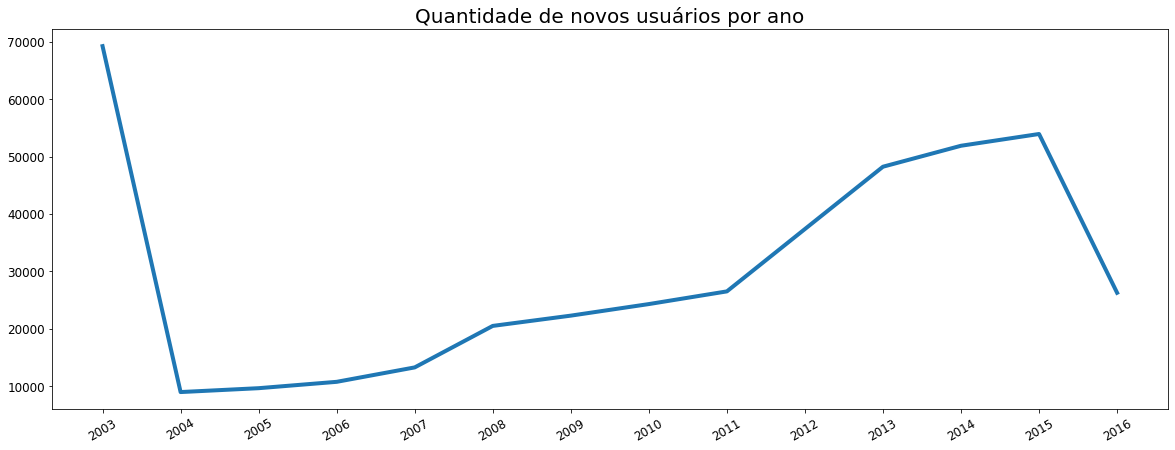

In [ ]:
fig,ax = plt.subplots(figsize=(20,7),                                           #Dimensionar a figura
                      facecolor='white')                                        #Escolhendo a cor do fundo

plt.plot('Ano','Total',data=qtd_usuarios_ano,                                   #Plotar o gráfico
         linewidth=4)

plt.xticks(range(2003,2017), fontsize=12,rotation =30)                          #Ajustar os valores do eixo x, tamanho, cor e rotacioná-los
plt.yticks(fontsize=12)                                                         #Ajutsar o tamanho e cor do eixo y

plt.title('Quantidade de novos usuários por ano',fontsize =20)                  #Colocar o título


A maior quantidade de novos usuários em 2003, possivelmente seja pela implantação do sistema neste ano. 

Ao decorrer dos anos o crescimento de novos usuários foi sempre positivo e tivemos um descréscimo em 2016, devido aos dados serem do ano de 2016, o que pode ter sido um atraso no tempo de processamento.


#### <font color= MediumSpringGreen> 2.12 Qual a quantidade de usuários que não realizaram nenhum empréstimo e quem são eles?

Na coluna "Circulation Active Year" temos o último ano de atividade de empréstimo/renovação de materiais. A partir deles podemos entender quantos e quem são os usuários que não possuem atividade a mais de um ano. 

Realziarei esta análise levando emc onta que o último ano do data set é de 2016.


In [ ]:
ano_atividade_biblioteca = dados_biblioteca[['Patron Type Definition','Circulation Active Year']]           #Criei um novo DF para manipular os dados
ano_atividade_biblioteca.columns = ['tipo_usuario','ano_circulacao_ativo']                                  #Renomeei a coluna
ano_atividade_biblioteca

,tipo_usuario,ano_circulacao_ativo
0,ADULT,None
1,ADULT,2016
2,ADULT,None
3,ADULT,None
4,ADULT,2016
...,...,...
423443,ADULT,2015
423444,ADULT,2016
423445,STAFF,2016
423446,ADULT,2015


In [ ]:
sem_atividade = ano_atividade_biblioteca.query("ano_circulacao_ativo == 'None'")                 #Filtrando apenas a quantidade de usuarios sem atividade
sem_atividade

,tipo_usuario,ano_circulacao_ativo
0,ADULT,None
2,ADULT,None
3,ADULT,None
5,SENIOR,None
11,ADULT,None
...,...,...
423436,DIGITAL ACCESS CARD,None
423437,JUVENILE,None
423438,ADULT,None
423439,JUVENILE,None


In [ ]:
total_usuarios = len(ano_atividade_biblioteca)                                  #Contar quantidade total de usuarios
usuarios_com_atividade = total_usuarios - len(sem_atividade)                    #Contar quantidade total de usuarios com atividade 
usuarios_sem_atividade = len(sem_atividade)                                     #Contar quantidade total de usuarios sem atividade 

In [ ]:
#Criar tabela de frequencia dos usuarios que não tem atividade
freq_sem_atividade = pd.DataFrame.from_dict({'Sem atividade':[usuarios_sem_atividade,round((usuarios_sem_atividade*100)/total_usuarios,2)], 
                                             'Com atividade':[usuarios_com_atividade,round((usuarios_com_atividade *100)/total_usuarios,2)]},
                                              orient='index',
                                              columns=['Quantidade','%'])
freq_sem_atividade

,Quantidade,%
Sem atividade,67904,16.04
Com atividade,355544,83.96


In [ ]:
#Criar tabela de frequencia dos tipos de usuarios sem atividade
df_sem_atividade = pd.DataFrame({'Total':sem_atividade_maior_1ano.iloc[:,0:1].value_counts(),
                                         '%': round(sem_atividade_maior_1ano.iloc[:,0:1].value_counts(normalize=True)*100,2)})                    
df_sem_atividade

,Total,%
tipo_usuario,,
ADULT,43576,64.17
WELCOME,6581,9.69
SENIOR,6193,9.12
JUVENILE,5124,7.55
YOUNG ADULT,4631,6.82
DIGITAL ACCESS CARD,1461,2.15
TEACHER CARD,206,0.30
SPECIAL,45,0.07
VISITOR,32,0.05


#### <font color= MediumSpringGreen> 2.11 Qual a quantidade de usuários que não realizam atividades de empréstimo/renovação a mais de 1 ano?


In [ ]:
sem_atividade_maior_1ano = ano_atividade_biblioteca.query("ano_circulacao_ativo < '2016'")                 #Filtrando apenas a quantidade de usuarios sem atividade a masiq ue um ano
sem_atividade_maior_1ano

,tipo_usuario,ano_circulacao_ativo
7,ADULT,2014
8,ADULT,2015
10,ADULT,2012
17,ADULT,2012
21,ADULT,2013
...,...,...
423434,JUVENILE,2015
423435,YOUNG ADULT,2015
423440,YOUNG ADULT,2014
423443,ADULT,2015


In [ ]:
usuarios_com_atividade_recente = total_usuarios - len(sem_atividade_maior_1ano)                    #Contar quantidade total de usuarios com atividade recente
usuarios_sem_atividade_maior_1ano = len(sem_atividade_maior_1ano)                                  #Contar quantidade total de usuarios sem atividade recente

In [ ]:
#Criar tabela de frequencia dos usuarios que não tem atividade
freq_sem_atividade_maior_1ano = pd.DataFrame.from_dict({'Sem atividade a mais de 1 ano':[usuarios_sem_atividade_maior_1ano,round((usuarios_sem_atividade_maior_1ano*100)/total_usuarios,2)], 
                                                        'Com atividade recente':[usuarios_com_atividade_recente,round((usuarios_com_atividade_recente *100)/total_usuarios,2)]},
                                                        orient='index',
                                                        columns=['Quantidade','%'])
freq_sem_atividade_maior_1ano

,Quantidade,%
Sem atividade a mais de 1 ano,207643,49.04
Com atividade recente,215805,50.96


In [ ]:
#Criar tabela de frequencia dos tipos de usuarios sem atividade a mais que um ano
df_sem_atividade_mais_que_1ano = pd.DataFrame({'Total':sem_atividade_maior_1ano.iloc[:,0:1].value_counts(),
                                                '%': round(sem_atividade_maior_1ano.iloc[:,0:1].value_counts(normalize=True)*100,2)})                    
df_sem_atividade_mais_que_1ano

,Total,%
tipo_usuario,,
ADULT,144559,69.62
JUVENILE,22230,10.71
SENIOR,17705,8.53
YOUNG ADULT,14743,7.10
WELCOME,6739,3.25
SPECIAL,464,0.22
TEACHER CARD,451,0.22
VISITOR,299,0.14
DIGITAL ACCESS CARD,189,0.09


#### <font color= MediumSpringGreen> 2.13 Qual a distribuição da quantidade média de empréstimos realizados por ano por tipo de usuário?

In [ ]:
emprestimos = dados_biblioteca[['Patron Type Definition','Total Checkouts','Year Patron Registered']]       #Selecionar colunas necessárias do df
emprestimos.columns = ['tipo_usuario', 'total_emprestimos','ano_registro']                                  #Renomear colunas
emprestimos

,tipo_usuario,total_emprestimos,ano_registro
0,ADULT,0,2014
1,ADULT,31,2010
2,ADULT,0,2016
3,ADULT,0,2015
4,ADULT,126,2003
...,...,...,...
423443,ADULT,291,2009
423444,ADULT,15,2016
423445,STAFF,208,2014
423446,ADULT,26,2003


In [ ]:
emprestimos_copia = emprestimos.copy()                                                                                        #Realizei uma copia do df para não ocorrer problemas na indexação
emprestimos_copia['emprestimos_por_ano'] = round((emprestimos['total_emprestimos'] /(2017 - emprestimos['ano_registro'])),2)  #Calcular a quantidade média de em´restimos por ano
emprestimos = emprestimos_copia                                                                                               #Recriar o df 
emprestimos

,tipo_usuario,total_emprestimos,ano_registro,emprestimos_por_ano
0,ADULT,0,2014,0.00
1,ADULT,31,2010,4.43
2,ADULT,0,2016,0.00
3,ADULT,0,2015,0.00
4,ADULT,126,2003,9.00
...,...,...,...,...
423443,ADULT,291,2009,36.38
423444,ADULT,15,2016,15.00
423445,STAFF,208,2014,69.33
423446,ADULT,26,2003,1.86


In [ ]:
emprestimos[['tipo_usuario','emprestimos_por_ano']].sort_values(by='emprestimos_por_ano',ascending=False)       #Ordenar a quantidade de empréstimso do maior para o menor

,tipo_usuario,emprestimos_por_ano
293371,ADULT,2564.79
163893,SENIOR,2293.00
146615,ADULT,1720.93
138351,ADULT,1544.14
200204,SENIOR,1533.08
...,...,...
224558,ADULT,0.00
224549,ADULT,0.00
224537,ADULT,0.00
224536,ADULT,0.00


##### <font color= MediumSpringGreen> 2.13.1 Visualização

Text(0.5, 1.0, 'Distribuição da quantidade média de empréstimos ao ano por tipo de usuário')

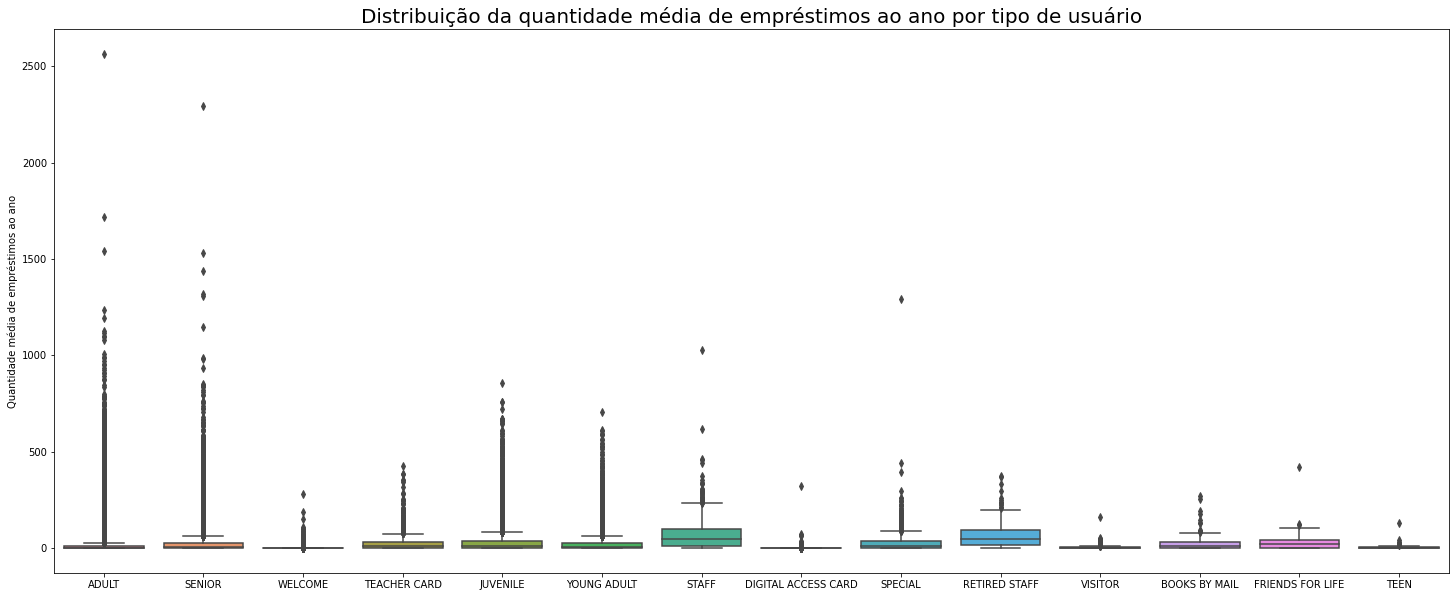

In [ ]:
plt.figure(figsize=(25,10))                                                                                           #Modificar o tamanho do gráfico
sns.boxplot(x='tipo_usuario', y="emprestimos_por_ano", data=emprestimos[['tipo_usuario','emprestimos_por_ano']])      #plotar o gráfico

plt.ylabel('Quantidade média de empréstimos ao ano')                                                                  #Renomear o rótulo da coluna y
plt.xlabel(None)                                                                                                      #Renomear o rótulo da coluna x

plt.title('Distribuição da quantidade média de empréstimos ao ano por tipo de usuário',fontsize= 20)                  #Colocar o título


Text(0.5, 1.0, 'Distribuição da quantidade média de empréstimos ao ano por tipo de usuário')

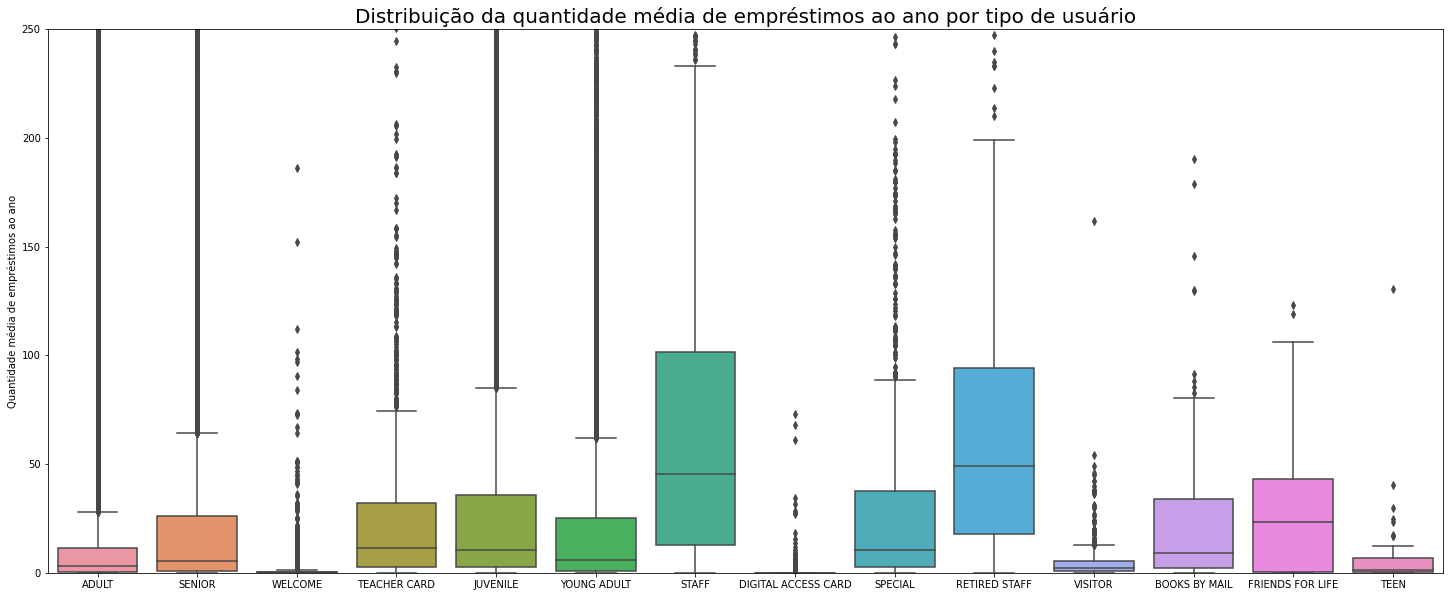

In [ ]:
plt.figure(figsize=(25,10))                                                                                           #Modificar o tamanho do gráfico
sns.boxplot(x='tipo_usuario', y="emprestimos_por_ano", data=emprestimos[['tipo_usuario','emprestimos_por_ano']])      #plotar o gráfico

plt.ylabel('Quantidade média de empréstimos ao ano')                                                                  #Renomear o rótulo da coluna y
plt.xlabel(None)                                                                                                      #Renomear o rótulo da coluna x
plt.ylim(0,250)                                                                                                       #Limitar o eixo y
plt.title('Distribuição da quantidade média de empréstimos ao ano por tipo de usuário',fontsize= 20)                  #Colocar o título


Podemos observar que a distribuição da quantidade média de empréstimos ao ano possui muitos outliers e a maior concentração fica até no máximo entre 25 a 225.

#### <font color= MediumSpringGreen> 2.14 Há uma correlação entre o número de empréstimos e de renovações?

In [364]:
emprestimos_renovacoes = dados_biblioteca[['Patron Type Definition','Total Checkouts','Total Renewals']]                #Selecionar colunas específicas
emprestimos_renovacoes.columns = ['tipo_usuario','total_emprestimos','total_renovacoes']                                #Renomear colunas
emprestimos_renovacoes   

,tipo_usuario,total_emprestimos,total_renovacoes
0,ADULT,0,0
1,ADULT,31,22
2,ADULT,0,0
3,ADULT,0,0
4,ADULT,126,11
...,...,...,...
423443,ADULT,291,13
423444,ADULT,15,11
423445,STAFF,208,58
423446,ADULT,26,0


In [ ]:
emprestimos_renovacoes['total_emprestimos'].corr(emprestimos_renovacoes['total_renovacoes'])            #Testar correlação

0.5893620279316916

Houve uma correlação moderada entre as duas variaveis, de acordo com o [coeficiente de Pearson](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson):

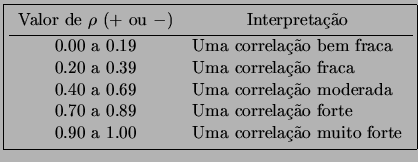

[*Fonte*](http://leg.ufpr.br/~silvia/CE003/node74.html)



##### <font color= MediumSpringGreen> 2.14.1 Visualização

Text(0.5, 1.0, 'Empréstimos X Renovações')

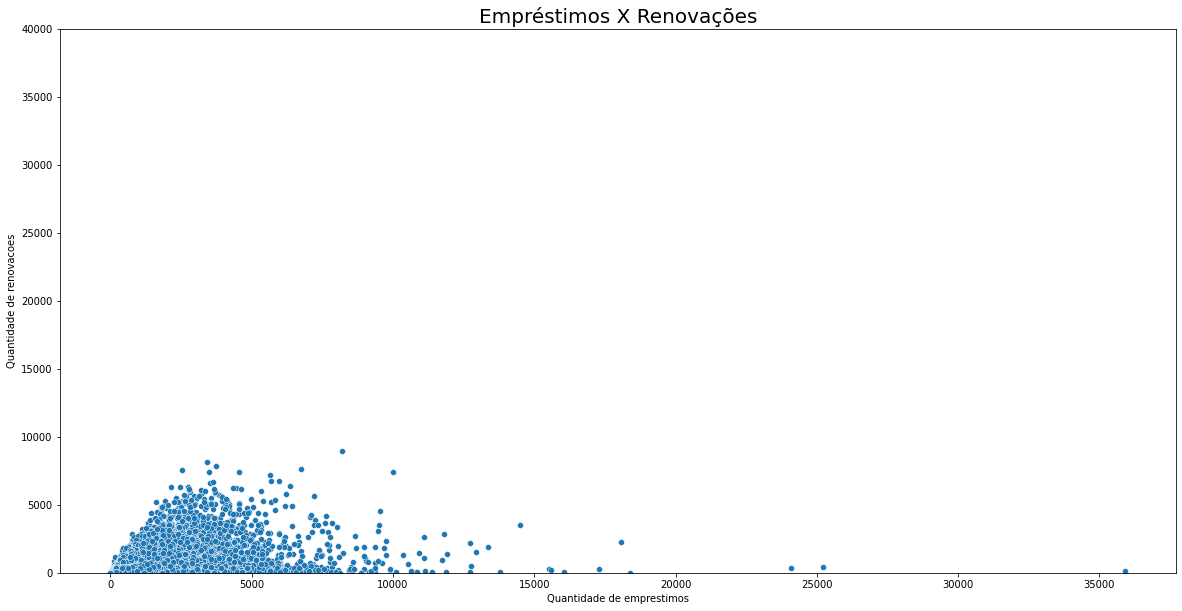

In [356]:
plt.figure(figsize=(20,10))                                                                                                             #Modificar o tamanho da figura
sns.scatterplot(x='total_emprestimos', y='total_renovacoes', data=emprestimos_renovacoes[['total_emprestimos','total_renovacoes']])     #Plotar o gráfico

plt.ylabel('Quantidade de renovacoes')                                                                                                  #Modificar o rótulo do eixo y
plt.xlabel('Quantidade de emprestimos')                                                                                                 #Modificar o rótulo do eixo x
plt.ylim(0,40000)                                                                                                                       #Modifica ro limite do eixo y

plt.title('Empréstimos X Renovações',fontsize=20)                                                                                       #Modificar o título

### <font color= MediumSpringGreen> 3 Considerações finais

A análise exploratória é uma fase importante e inicial em um projeto de ciência de dados. Com ela é possível entender melhor os dados para se responder alguns questionamentos e preparar eles para análises e questionamentos mais aprofundados. 

Pude responder todos os questionamentos estabelecidos no início do projeto, entretanto a relação entre faixa etária e tipo de usuários ficou sem respostas, devido a sua falta de coerência.
 
Esta análise apenas deu o primeiro passo e fica aberto para outras pessoas estabelecerem novas perspectivas baseadas nesta.